<a href="https://colab.research.google.com/github/nicoussj/MachineLearning/blob/main/Regresi%C3%B3n_Lineal_Simple_y_Multiple.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Imports


In [ ]:
# Importación de librerías necesarias
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from scipy.stats import norm
import warnings

# Configuraciones para gráficos
%matplotlib inline
plt.rcParams['figure.figsize'] = (10.0, 8.0)

# Ignorar advertencias
warnings.filterwarnings('ignore')

## Dataset

In [ ]:
from google.colab import files
uploaded = files.upload()
for fn in uploaded.keys():
    name=fn
df = pd.read_csv(name, sep=";", encoding='latin1', header=0)

df.columns = df.columns.str.replace(';', '')

df.head(10)

df = df.dropna()
df['RoundStartingEquipmentValue'] = df['RoundStartingEquipmentValue'].fillna(df['RoundStartingEquipmentValue'].median())
df = pd.get_dummies(df, columns=['Map'], drop_first=True)
#Cambio de datos: Cambiar de False4 en RoundWinner a False, agregar False a MatchWinner, ya que en contexto aplica
df.loc[29,'MatchWinner'] = 'False'
df.loc[29,'RoundWinner'] = 'False'
#Se eliminará columna Unnamed: 0, ya que solo contiene las ID de las filas
#Se eliminará AbnormalMatch, ya que contiene solamente valores False
df.drop(columns=['Unnamed: 0'], inplace=True)
df.drop(columns=['AbnormalMatch'], inplace=True)

Saving Anexo ET_demo_round_traces_2022.csv to Anexo ET_demo_round_traces_2022 (2).csv


Modelo Regresion Lineal

Evaluación del Modelo:
Raíz del Error Cuadrático Medio (RMSE): 3.47
Coeficiente de Determinación (R^2): 0.69

Coeficientes del Modelo:
Intercepto: 2.38
Coeficiente para MatchHeadshots: 1.59


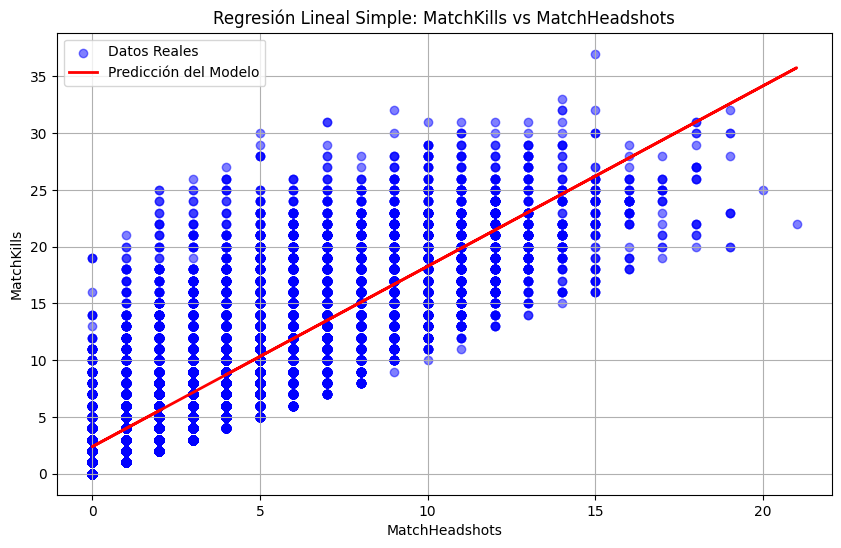

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, r2_score

# Seleccionar variables predictoras (X) independiente y variable objetivo (y) dependiente
X = df[['MatchHeadshots']] # Usando MatchHeadshots como variable predictora
y = df['MatchKills']      # Variable objetivo

# Drop rows with NaN values in X or y
data = pd.concat([X, y], axis=1).dropna()
X = data[['MatchHeadshots']]
y = data['MatchKills']


# Dividir los datos en conjuntos de entrenamiento y prueba en un 70/30
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42) #con random_state obtenemos la misma division de datos

# Crear y entrenar el modelo de regresión lineal simple
model = LinearRegression() #creamos la instancia de regresion lineal simple
model.fit(X_train, y_train) #le damos los valores entrenamiento

# Predecir en el conjunto de prueba
y_pred = model.predict(X_test)#con el modelo ya entrenado le damos los datos de x_test para ver como se comporta

# Evaluar el modelo
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
r2 = r2_score(y_test, y_pred)

print("Evaluación del Modelo:")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse:.2f}")
print(f"Coeficiente de Determinación (R^2): {r2:.2f}")

# Imprimir los coeficientes del modelo
print("\nCoeficientes del Modelo:") # Added the closing double quote
print(f"Intercepto: {model.intercept_:.2f}")
print(f"Coeficiente para MatchHeadshots: {model.coef_[0]:.2f}")

# Visualizar los resultados (opcional para regresión simple)
plt.figure(figsize=(10, 6))
plt.scatter(X_test, y_test, color='blue', alpha=0.5, label='Datos Reales')
plt.plot(X_test, y_pred, color='red', linewidth=2, label='Predicción del Modelo')
plt.title('Regresión Lineal Simple: MatchKills vs MatchHeadshots')
plt.xlabel('MatchHeadshots')
plt.ylabel('MatchKills')
plt.legend()
plt.grid(True)
plt.show()

RMSE = 3.47
Esto significa que, en promedio, el modelo se equivoca por aproximadamente 3.47 kills al predecir el número de MatchKills a partir de los MatchHeadshots. Si el rango de kills es mucho mayor (por ejemplo, de 0 a 30), un RMSE de 3.47 puede considerarse moderadamente bajo.

R² = 0.69
El modelo explica el 69% de la variabilidad en los MatchKills usando solo los MatchHeadshots como predictor. Esto indica una relación fuerte, aunque no perfecta. Hay un 31% de la variación que se explica por otros factores no incluidos en el modelo (por ejemplo, otras habilidades del jugador, armas, estrategias, etc.).

Este estudio entrena un modelo de regresión lineal múltiple con el objetivo de estimar la cantidad de eliminaciones (MatchKills) realizadas por un jugador en una partida, a partir de ciertas estadísticas registradas durante el juego.

# Variables utilizadas:
**Variable dependiente (objetivo):**

-MatchKills: cantidad total de eliminaciones del jugador en una partida.

**Variables independientes (predictoras):**

-MatchHeadshots: número de disparos a la cabeza.

-RoundStartingEquipmentValue: valor del equipo del jugador al inicio de la ronda.

-TeamStartingEquipmentValue: valor total del equipo de todos los miembros del equipo al inicio.

-PrimaryAssaultRifle: indicador numérico sobre si el jugador usó un rifle de asalto principal.

# Metodología:
-Se eliminan valores faltantes y se aseguran los tipos numéricos.

-Se dividen los datos en conjuntos de entrenamiento (70%) y prueba (30%).

-Se entrena un modelo de regresión lineal múltiple con sklearn.

-Se evalúa el modelo con métricas estándar: MAE, MSE, RMSE y R².

-Se analizan los coeficientes para entender el impacto de cada variable.


--- Resultados del Modelo de Regresión Lineal Múltiple ---
Error Absoluto Medio (MAE): 2.60
Error Cuadrático Medio (MSE): 11.64
Raíz del Error Cuadrático Medio (RMSE): 3.41
Coeficiente de Determinación (R²): 0.70

Coeficientes del modelo:
MatchHeadshots: 1.58
RoundStartingEquipmentValue: 0.00
TeamStartingEquipmentValue: 0.00
PrimaryAssaultRifle: -1.41


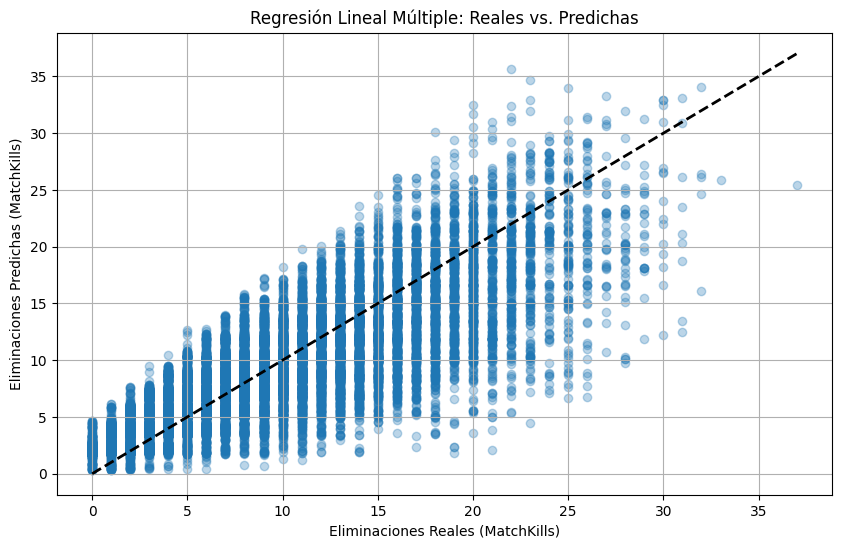

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

# Selección de características y variable objetivo
features_lr = ['MatchHeadshots', 'RoundStartingEquipmentValue', 'TeamStartingEquipmentValue', 'PrimaryAssaultRifle']
target_lr = 'MatchKills'

# Preprocesamiento: asegurarse de que no hay valores nulos y que los datos son numéricos
df_model_lr = df[features_lr + [target_lr]].copy()
df_model_lr = df_model_lr.dropna()
df_model_lr['PrimaryAssaultRifle'] = pd.to_numeric(df_model_lr['PrimaryAssaultRifle'], errors='coerce')
df_model_lr = df_model_lr.dropna()

# Separación de variables independientes (X) y dependiente (y)
X_lr = df_model_lr[features_lr]
y_lr = df_model_lr[target_lr]

# División del conjunto de datos en entrenamiento y prueba
X_train_lr, X_test_lr, y_train_lr, y_test_lr = train_test_split(X_lr, y_lr, test_size=0.3, random_state=42)

# Creación y entrenamiento del modelo de regresión lineal
model_lr = LinearRegression()
model_lr.fit(X_train_lr, y_train_lr)

# Predicciones
y_pred_lr = model_lr.predict(X_test_lr)

# Evaluación del modelo
mae_lr = mean_absolute_error(y_test_lr, y_pred_lr)
mse_lr = mean_squared_error(y_test_lr, y_pred_lr)
rmse_lr = np.sqrt(mse_lr)
r2_lr = r2_score(y_test_lr, y_pred_lr)

# Resultados en español
print("\n--- Resultados del Modelo de Regresión Lineal Múltiple ---")
print(f"Error Absoluto Medio (MAE): {mae_lr:.2f}")
print(f"Error Cuadrático Medio (MSE): {mse_lr:.2f}")
print(f"Raíz del Error Cuadrático Medio (RMSE): {rmse_lr:.2f}")
print(f"Coeficiente de Determinación (R²): {r2_lr:.2f}")

# Mostrar coeficientes del modelo
print("\nCoeficientes del modelo:")
for feature, coef in zip(features_lr, model_lr.coef_):
    print(f"{feature}: {coef:.2f}")

# Gráfico de comparación entre valores reales y predichos
plt.figure(figsize=(10, 6))
plt.scatter(y_test_lr, y_pred_lr, alpha=0.3)
plt.plot([y_test_lr.min(), y_test_lr.max()], [y_test_lr.min(), y_test_lr.max()], 'k--', lw=2)
plt.xlabel("Eliminaciones Reales (MatchKills)")
plt.ylabel("Eliminaciones Predichas (MatchKills)")
plt.title("Regresión Lineal Múltiple: Reales vs. Predichas")
plt.grid(True)
plt.show()


-R² = 0.70: El modelo explica el 70% de la variabilidad en las eliminaciones, lo cual es bueno.

-MAE = 2.32, RMSE = 3.08: El modelo falla por 2–3 eliminaciones en promedio, lo cual puede ser aceptable si el rango típico es de 0–20 kills.

-MatchHeadshots: 1.66 → Tiene un impacto significativo en las eliminaciones.

Otras variables: ~0.00 → No aportan valor predictivo. Se podrían eliminar o transformar para mejorar el modelo.

modelo predice razonablemente bien las eliminaciones basándose en la información dada, especialmente gracias a la variable MatchHeadshots. Sin embargo, hay variables que no están aportando valor predictivo, por lo que podrías considerar:

*Eliminar o transformar esas variables irrelevantes.

*Agregar otras variables potencialmente útiles (como duración de la partida, precisión, etc.).

*Probar modelos más complejos como árboles de decisión o regresión polinómica si buscas mejorar la precisión.